# Triangular Window

The **triangular window** is a simple tapering function used in spectral analysis. It is shaped like a triangle (hence the name) and is symmetric. It reduces spectral leakage compared to the rectangular window, though not as effectively as windows like Hamming or Hann.

This notebook defines the triangular window in both its **even** and **odd** forms, computes its spectrum, and compares the time- and frequency-domain characteristics.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

## Analysis Parameters

We define:
- `M`: Window length (even or odd)
- `N`: FFT length (usually larger than M)
- `dBCut`: Lower bound for magnitude in dB


In [12]:
M = 64  # Window length
N = 2**int(np.ceil(np.log2(M * 16)))  # FFT length
dBCut = -100  # Threshold for dB plot

Modd = M % 2
Mo2 = (M - Modd) // 2


## Triangular Window Definition

The triangular window is a symmetric, linearly tapered window. Its mathematical definition is:

If M is **odd**: The window is symmetric around a central sample. Its maximum value is at the center
$$
w[n] = 1 - \frac{2|n - \frac{M-1}{2}|}{M}, \quad 0 \leq n < M
$$

If M is **even**: The symmetry is between two center samples, not on a single one. There is no sample exactly at the peak
$$
w[n] = 1 - \frac{2|n - \frac{M}{2}|}{M}, \quad 0 \leq n < M
$$

The symmetry affects the frequency response:
- Even windows tend to have slightly more leakage because their symmetry is not perfect around a center.
- Odd windows have slightly cleaner spectral characteristics due to exact symmetry.

| Case     | Symmetry        | Peak Position       | Use Case                                                       |
| -------- | --------------- | ------------------- | -------------------------------------------------------------- |
| **Odd**  | Around center   | Exact center sample | Preferred for symmetry-critical analysis                       |
| **Even** | Between samples | Two middle samples  | Common in standard implementations (e.g., FFTs of even length) |


In [13]:
if M % 2 == 1:
    # Odd length
    wt_half = 2 * np.arange(1, (M + 1) // 2 + 1) / (M + 1)
    wt = np.concatenate([wt_half, wt_half[-2::-1]])
else:
    # Even length
    wt_half = (2 * np.arange(1, (M + 1) // 2 + 1) - 1) / M
    wt = np.concatenate([wt_half, wt_half[::-1]])

wt = wt.reshape(-1)  # Ensure column-like vector


## Spectrum of the Triangular Window

We compute the FFT of the zero-padded triangular window, convert it to dB scale, normalize to 0 dB, and clip values below `dBCut`.


In [14]:
# Zero-padded window (centered for FFT)
wtzp = np.concatenate([wt[Mo2:], np.zeros(N - M), wt[:Mo2]])

# FFT
Wtzp = np.fft.fft(wtzp)

# Avoid log(0)
eps = np.finfo(float).eps
magWt_dB = 20 * np.log10(np.abs(Wtzp) + eps)
magWt_dB -= np.max(magWt_dB)
magWt_dB = np.maximum(magWt_dB, dBCut)


## Visualization

We plot the triangular window and its frequency response in decibels. The window shows smoother tapering compared to the rectangular window and exhibits better side-lobe attenuation.


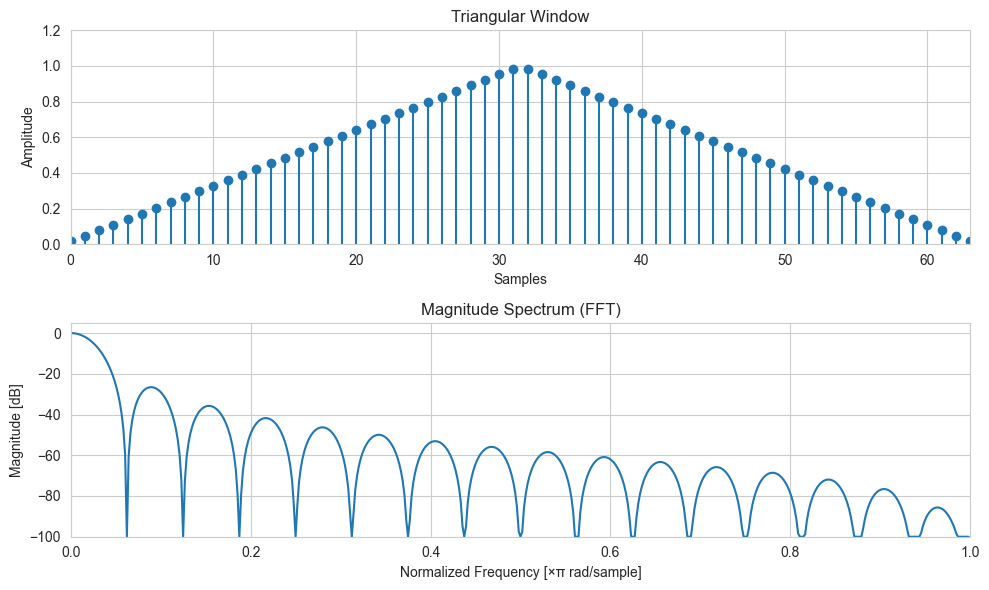

In [ ]:
# Time and frequency axes
n = np.arange(M)
nf = np.linspace(0, 2, N, endpoint=False)[:N//2]

# Plot
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.stem(n, wt, basefmt=" ")
plt.title('Triangular Window')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.xlim(0, M - 1)
plt.ylim(0, 1.2)

plt.subplot(2, 1, 2)
plt.plot(nf, magWt_dB[:N//2])
plt.title('Magnitude Spectrum (FFT)')
plt.xlabel(r'Normalized Frequency [$\pi$ rad/sample]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(dBCut, 5)

plt.tight_layout()
plt.show()


## Conclusion

The triangular window offers a compromise between main lobe width and side-lobe suppression. It has:

- **Better side-lobe attenuation** than the rectangular window.
- **Wider main lobe**, leading to reduced frequency resolution.

It is closely related to the convolution of two rectangular windows and appears in many applications where modest spectral leakage suppression is acceptable.
